# Twinks detection

## Load data and finding most common words and same comments

In [16]:
import json
import collections, copy
import numpy as np
import string
import itertools
import matplotlib.pyplot as plt

* The next block of code loads the data and finds the most common words:
  There are 3 functions:
    * `load_data` loads the data from the json file
    * `find_popular_phrase` finds the most common words in the comments
    * `print_popular_phrases` prints the most common words - it is used for debugging

In [17]:
# Load data
def load_data(path):
    """
    Loads data from jsonl file
    :param1 path: path to jsonl file
    """
    with open(path, 'r') as f:
        data = [json.loads(line) for line in f]
    return data

def find_popular_phrase(data_messages, top_n = 10, short_phrases = None):
    """
    Finds the most common words in the comments
    :param data_messages: data to analyse
    :param top_n: number of most common words to return
    :param short_phrases: phrases that are not counted as words (e.g. '+1')
    :return: list of tuples (word, count)
    """
    if short_phrases is None:
        short_phrases = ['+1', 'lol', 'lmao', 'rofl', 'omg']
    phrases_counter = collections.Counter()
    for line in data_messages:
        line['message'].translate(str.maketrans('', '', string.punctuation))
        for word in line['message'].lower().split():
            if word == '' or word in string.punctuation:
                continue
            if word in short_phrases or len(word) >= 2:
                phrases_counter[word] += 1
    return phrases_counter.most_common(top_n)

def print_popular_phrases(data_messages, top_n = 10, short_phrases = None):
    """
    Prints the most common words
    :param data_messages: data to analyse
    :param top_n: top n words to print
    :param short_phrases: phrases that aren't counted as words
    :return:
    """

# phrases to find top
    print('Top popular phrases:')
    for phrase, count in find_popular_phrase(data_messages, top_n, short_phrases):
        print(f'{phrase}: {count}')



### Analyse top phrases to create a list of trivial phrases

In [18]:
# set path to data here
data_mes = load_data('2022.jsonl')
data_to_print = copy.deepcopy(data_mes)
print_popular_phrases(data_mes, 200)

Top popular phrases:
the: 18829
to: 11213
in: 7921
is: 7122
this: 5976
and: 5756
it: 5665
that: 5118
for: 5040
of: 4406
be: 3852
you: 3674
not: 3144
but: 2731
with: 2592
if: 2554
at: 2413
as: 2216
on: 2191
have: 2051
so: 1994
we: 1702
would: 1698
done: 1697
just: 1542
are: 1527
can: 1500
should: 1486
was: 1383
from: 1339
do: 1331
or: 1302
an: 1203
will: 1132
there: 1103
use: 1084
only: 1081
change: 1073
could: 1067
some: 1057
patch: 1022
one: 1016
what: 1015
don't: 985
see: 979
it's: 978
which: 974
no: 973
when: 971
please: 955
also: 945
by: 941
my: 906
like: 889
test: 888
looks: 862
all: 839
then: 830
think: 829
need: 797
code: 760
thanks: 757
other: 751
here: 732
your: 729
more: 712
any: 705
good: 689
now: 686
same: 658
about: 657
commit: 646
line: 646
new: 646
me: 631
make: 626
i'm: 618
has: 613
because: 605
file: 583
fix: 576
get: 575
used: 569
case: 565
still: 561
does: 553
how: 551
set: 550
using: 542
add: 541
seems: 523
these: 523
doesn't: 516
check: 505
after: 487
why: 472
buil

In [19]:
common_phrases = [
    '+1',
    'done',
    'thanks',
    'hi',
    'thank',
    ':-)',
    'ok',
    'please',
    'looks',
    'good',
    'nice',
    'sure'
]

# common words consist of common articles, prepositions, conjunctions, etc.
common_words = find_popular_phrase(data_mes, 30, common_phrases)
common_words = [word for word, count in common_words]

In [20]:
def create_dict(message_dat, words_more_than = 1):
    """
    Create dictionary
    :param message_dat: data
    :param words_more_than: count of words in message more than will be included into dictionary
    :return: dictionary of same messages with list of authors
    """
    groups = collections.defaultdict(list)
    for line in message_dat:
        line['message'] = line['message'].lower()
        if line['author_id'] not in groups[line['message']] and len(line['message'].split()) > words_more_than:
            groups[line['message']].append(line['author_id'])
    return groups


same_mes = create_dict(data_mes, 2) # dictionary of same messages with list of authors
data_for_freq = copy.deepcopy(data_mes)  # we need to save data for frequency dictionary
print(same_mes)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
# now we need to find only same messages with more than 1 author
def find_same_messages(same_messages):
    """
    Sort dictionary next way: if there are more than 1 author have same comment
    :param same_messages: data
    :return: list of authors_ids
    """
    more_one_author = []
    for accounts in same_messages.values():
        if len(accounts) > 1 and accounts not in more_one_author:
            more_one_author.append(accounts)
    return more_one_author

large_same_mes = find_same_messages(same_mes)
print(large_same_mes)

[[1000013, 1000789], [1002951, 1000013], [1002951, 1002862, 1000521], [1000130, 1002002], [1000013, 1002376], [1000013, 1000023], [1000994, 1000006], [1000022, 1001002, 1002002], [1000062, 1000521], [1000947, 1000871], [1000013, 1000789, 1000871], [1000135, 1002951, 1003180, 1002862], [1000664, 1001306], [1003042, 1003542], [1000789, 1002268], [1000994, 1002115], [1002210, 1002268], [1000013, 1000521]]


In [22]:
# find all possible combinations of authors in same messages
def find_all_combinations(large):
    all_comb = []
    for accounts in large:
        all_comb.extend(list(itertools.combinations(accounts, 2)))
    return all_comb

all_combinations = find_all_combinations(large_same_mes)
print(all_combinations)


[(1000013, 1000789), (1002951, 1000013), (1002951, 1002862), (1002951, 1000521), (1002862, 1000521), (1000130, 1002002), (1000013, 1002376), (1000013, 1000023), (1000994, 1000006), (1000022, 1001002), (1000022, 1002002), (1001002, 1002002), (1000062, 1000521), (1000947, 1000871), (1000013, 1000789), (1000013, 1000871), (1000789, 1000871), (1000135, 1002951), (1000135, 1003180), (1000135, 1002862), (1002951, 1003180), (1002951, 1002862), (1003180, 1002862), (1000664, 1001306), (1003042, 1003542), (1000789, 1002268), (1000994, 1002115), (1002210, 1002268), (1000013, 1000521)]


In [23]:
## frequency dictionary for each author

In [24]:
# create frequency dictionary for each author without trivial phrases
def crete_freq_dict(data, common):
    """
    Create frequency dictionary
    :param data: main data
    :param common: common words that we dont have to add to dictionary
    :return: frequency dictionary for each author
    """
    freq = {}
    for line in data:
        if line['author_id'] not in freq:
            freq[line['author_id']] = collections.Counter()
        message = line['message'].translate(str.maketrans('', '', string.punctuation))
        for word in message.lower().split():
            if word == '':
                continue
            if word not in common:
                freq[line['author_id']].update([word])
    return freq

# We can set common_words here not common_phrases
freq_dict = crete_freq_dict(data_for_freq, common_phrases)
print(freq_dict)

{1000697: Counter({'the': 52, 'to': 28, 'i': 27, 'a': 20, 'in': 17, 'it': 17, 'and': 14, 'script': 11, 'be': 11, 'is': 10, 'on': 9, 'for': 9, 'git': 7, 'of': 7, 'if': 7, 'as': 7, 'that': 7, 'not': 7, 'need': 6, 'there': 6, 'new': 6, 'now': 6, 'can': 5, 'modify': 5, 'or': 5, 'do': 5, 'still': 5, 'my': 5, 'this': 5, 'commit': 4, 'here': 4, 'about': 4, 'does': 4, 'seems': 4, 'at': 4, 'you': 4, 'are': 4, 'things': 4, 'have': 4, 'tinderbox': 4, 'modified': 4, 'test': 4, 'would': 4, 'message': 3, 'only': 3, 'by': 3, 'also': 3, 'look': 3, 'mailing': 3, 'list': 3, 'phasessh': 3, 'some': 3, 'one': 3, 'results': 3, 'run': 3, 'bits': 3, 'should': 3, 'well': 3, 'jenkins': 3, 'lode': 3, 'repo': 3, 'what': 3, 'was': 3, 'guess': 3, 'see': 3, 'version': 3, 'patch': 3, 'then': 2, 'amend': 2, 'push': 2, 'taken': 2, 'changes': 2, 'but': 2, 'already': 2, 'say': 2, '4': 2, 'review': 2, 'emacs': 2, 'old': 2, 'trivial': 2, 'file': 2, 'more': 2, 'all': 2, 'before': 2, 'submit': 2, 'like': 2, 'without': 2, 'fi

In [25]:
def analyse_frequency_dicts(data_dict, top_k = 10, threshold = 0.5, min_words = 2):
    """
    Analyse frequency dictionaries and find suspicious accounts
    :param data_dict: frequency dictionary
    :param top_k: top k words to compaer
    :param threshold: threshold for suspicious accounts
    :param min_words: if less than min_words words in account, we have to adjust threshold
    :return: list of suspicious accounts
    """
    suspicious = []
    for account1, account2 in itertools.combinations(data_dict.keys(), 2):
        top_words1 = set([word for word, count in data_dict[account1].most_common(top_k)])
        top_words2 = set([word for word, count in data_dict[account2].most_common(top_k)])
        common_words = top_words1.intersection(top_words2)
        words1_count = sum(data_dict[account1].values())
        words2_count = sum(data_dict[account2].values())

        if len(common_words) == 0:
            continue
        # if one of the accounts has less than min_words words, we have to adjust threshold
        adjusted_threshold = threshold
        if words1_count < min_words or words2_count < min_words:
            adjusted_threshold = threshold * (1 - (min_words - min(words1_count, words2_count)) / min_words)
            # adjusted_threshold = threshold - 0.05
        if len(common_words) / top_k >= adjusted_threshold:
            suspicious.append((account1, account2))
    return suspicious

suspicious_accounts = analyse_frequency_dicts(freq_dict, 10, 0.1, 2)
print(suspicious_accounts)


[(1000697, 1000321), (1000697, 1000994), (1000697, 1000003), (1000697, 1000043), (1000697, 1003771), (1000697, 1000045), (1000697, 1003889), (1000697, 1001613), (1000697, 1000013), (1000697, 1002268), (1000697, 1001318), (1000697, 1000804), (1000697, 1000022), (1000697, 1000002), (1000697, 1000446), (1000697, 1000447), (1000697, 1000166), (1000697, 1000037), (1000697, 1000083), (1000697, 1000179), (1000697, 1000135), (1000697, 1000779), (1000697, 1000006), (1000697, 1001872), (1000697, 1003708), (1000697, 1000027), (1000697, 1000068), (1000697, 1003877), (1000697, 1002951), (1000697, 1003858), (1000697, 1000028), (1000697, 1003854), (1000697, 1001002), (1000697, 1000789), (1000697, 1001818), (1000697, 1003564), (1000697, 1003881), (1000697, 1002677), (1000697, 1002115), (1000697, 1000023), (1000697, 1003871), (1000697, 1001965), (1000697, 1001582), (1000697, 1000805), (1000697, 1000154), (1000697, 1003606), (1000697, 1000062), (1000697, 1001501), (1000697, 1002376), (1000697, 1002862),

In [26]:
def combine_results(suspicious_ac, all_comb):
    """
    Combine results of suspicious accounts and repeated messages
    :param suspicious_ac:  list of suspicious accounts
    :param all_comb: list of same messages
    :return: list of suspicious accounts
    """
    set_suspicious = {tuple(sorted(i)) for i in suspicious_ac}
    set_comb = {tuple(sorted(i)) for i in all_comb}
    comb = set_suspicious.intersection(set_comb)
    return list(comb)


twins_accounts = combine_results(suspicious_accounts, all_combinations)
print(len(twins_accounts))
print(twins_accounts)



27
[(1000013, 1000871), (1000022, 1001002), (1000135, 1002862), (1001002, 1002002), (1000130, 1002002), (1000013, 1002951), (1000022, 1002002), (1000871, 1000947), (1003042, 1003542), (1002951, 1003180), (1000521, 1002951), (1000062, 1000521), (1000789, 1000871), (1000994, 1002115), (1000789, 1002268), (1000013, 1002376), (1000013, 1000521), (1002862, 1003180), (1000521, 1002862), (1000664, 1001306), (1002862, 1002951), (1000135, 1003180), (1000013, 1000789), (1000006, 1000994), (1000135, 1002951), (1000013, 1000023), (1002210, 1002268)]


Threshold: 0.1, coincidenced accs: 20369, detected twins: 27
Threshold: 0.13333333333333333, coincidenced accs: 17378, detected twins: 27
Threshold: 0.16666666666666666, coincidenced accs: 17378, detected twins: 27
Threshold: 0.19999999999999998, coincidenced accs: 17378, detected twins: 27
Threshold: 0.2333333333333333, coincidenced accs: 13138, detected twins: 24
Threshold: 0.2666666666666666, coincidenced accs: 13138, detected twins: 24
Threshold: 0.29999999999999993, coincidenced accs: 13138, detected twins: 24
Threshold: 0.33333333333333326, coincidenced accs: 9082, detected twins: 23
Threshold: 0.3666666666666666, coincidenced accs: 9082, detected twins: 23
Threshold: 0.3999999999999999, coincidenced accs: 9082, detected twins: 23
Threshold: 0.43333333333333324, coincidenced accs: 6363, detected twins: 22
Threshold: 0.46666666666666656, coincidenced accs: 6363, detected twins: 22
Threshold: 0.4999999999999999, coincidenced accs: 6363, detected twins: 22
Threshold: 0.5333333333333

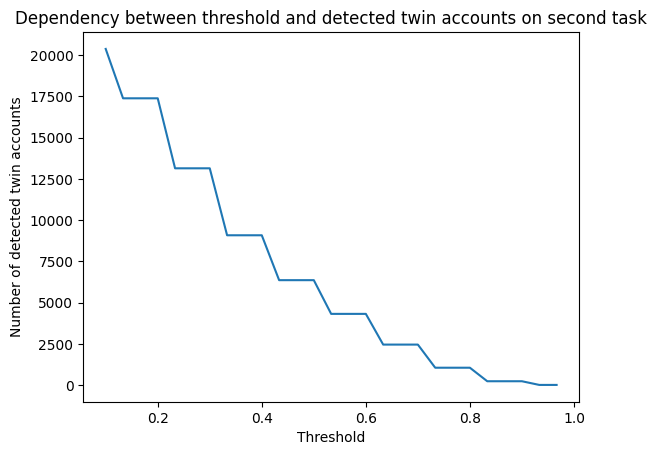

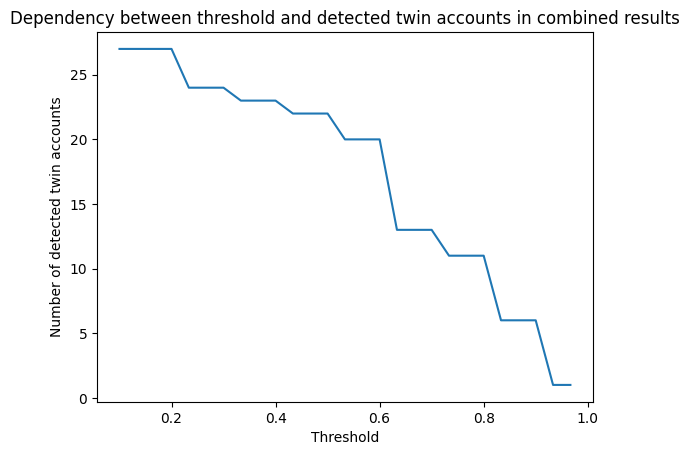

In [31]:
def analyse_threshold(data, all_comb, top_k=10, min_words=2, num_steps=20):
    thresholds = np.arange(0.1, 1, 1 / num_steps)
    detected_twins = []
    res = []

    for threshold in thresholds:
        suspicious_acc = analyse_frequency_dicts(data, top_k, threshold, min_words)
        detected_twins.append(len(suspicious_acc))
        comb = combine_results(suspicious_acc, all_comb)
        res.append(len(comb))
        print(f'Threshold: {threshold}, coincidenced accs: {len(suspicious_acc)}, detected twins: {len(comb)}')
        # print(comb)


    plt.plot(thresholds, detected_twins)
    plt.xlabel('Threshold')
    plt.ylabel('Number of detected twin accounts')
    plt.title('Dependency between threshold and detected twin accounts on second task')
    plt.show()

    # second plot with combined results
    plt.plot(thresholds, res)
    plt.xlabel('Threshold')
    plt.ylabel('Number of detected twin accounts')
    plt.title('Dependency between threshold and detected twin accounts in combined results')

    plt.show()

analyse_threshold(freq_dict, all_combinations, 10, 2, 30)


So if we look at the first plot we can see that threshold between 0.65 - 0.85 is the best for detecting twin accounts.

## Additional tools

In [28]:
def print_all_author_messages_to_file(data, author_id, file_name):
    author_messages = []
    for line in data:
        if line['author_id'] == author_id:
            author_messages.append(line)

    def sorting_key(message):
        first_char = message['message'][0].lower()
        if first_char.isalpha():
            return (0, first_char)
        else:
            return (1, message['message'])

    author_messages.sort(key=sorting_key)

    with open(file_name, 'w') as f:
        for line in author_messages:
            # Заменяем все символы новой строки и пробелы на пробелы, чтобы сделать сообщение одной строкой
            single_line_message = line['message'].replace('\n', ' ').replace('\r', ' ')
            f.write(single_line_message + '\n')
            f.write('\n')
            
print_all_author_messages_to_file(data_to_print, 1000130, 'author1.txt')
print_all_author_messages_to_file(data_to_print, 1002002, 'author2.txt')


In [30]:
# print frequency dictionary to file
def print_dict(data_dict, author_id, top_k, file_name):
    cur = data_dict[author_id]
    with open(file_name, 'w') as f:
        for word, count in cur.most_common(top_k):
            f.write(f'{word} - {count}\n')

print_dict(freq_dict, 1000130, 20, 'author1_freq.txt')
print_dict(freq_dict, 1002002, 20, 'author2_freq.txt')